In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:


# Function to process each file
def process_file(file_path, n):
    data = pd.read_csv(file_path)
    
    # Extract relevant columns
    acc_columns = ['ACC_0', 'ACC_1', 'ACC_2']
    label_column = 'label'
    
    # Map label numbers to actual style names
    label_map = {0: 'transition', 1: 'freestyle', 2: 'breaststroke', 3: 'backstroke', 4: 'butterfly', 5: 'transition'}
    data['label'] = data['label'].map(label_map)
    
    # List to store processed rows
    rows = []
    
    # Group data by continuous labels
    current_label = None
    current_group = []
    
    for i, row in data.iterrows():
        label = row['label']
        
        if label != current_label:
            if current_group:
                rows.extend(process_group(current_group, n, current_label, acc_columns))
            current_group = []
            current_label = label
            
        current_group.append(row)
    
    # Process the last group
    if current_group:
        rows.extend(process_group(current_group, n, current_label, acc_columns))
    
    return rows

# Function to process a group of continuous label data
def process_group(group, n, label, acc_columns):
    rows = []
    num_entries = len(group)
    
    # Convert the group (list of rows) into a DataFrame
    group_df = pd.DataFrame(group)
    
    # Split into chunks of size n
    for i in range(0, num_entries, n):
        chunk = group_df.iloc[i:i+n]
        
        if len(chunk) < n:
            # Handle the case where the last chunk is smaller than n
            previous_chunk = group_df.iloc[i-n:i] if i >= n else group_df.iloc[:i]
            chunk = pd.concat([previous_chunk, chunk]).tail(n)  # Get the last n readings
        
        acc_values = chunk[acc_columns].round(0).astype(int)
        input_str = f"X: {list(acc_values['ACC_0'])}\nY: {list(acc_values['ACC_1'])}\nZ: {list(acc_values['ACC_2'])}"
        rows.append([input_str, label])
    
    return rows

# Directory paths and parameters
data_dir = "Swim"
n = 100

# List to hold all data
all_data = []

# Process each swimmer folder
for swimmer in os.listdir(data_dir):
    swimmer_path = os.path.join(data_dir, swimmer)
    if os.path.isdir(swimmer_path):
        for file in os.listdir(swimmer_path):
            file_path = os.path.join(swimmer_path, file)
            if file.endswith(".csv"):
                all_data.extend(process_file(file_path, n))

# Convert to DataFrame
df = pd.DataFrame(all_data, columns=['Input', 'Label'])

In [3]:

df = pd.DataFrame(all_data, columns=['input', 'output'])
df = df.dropna()  # Drop rows with NaN values


# Split into Train, Test, Val
train, test = train_test_split(df, test_size=0.3, stratify=df['Label'])
val, test = train_test_split(test, test_size=2/3, stratify=test['Label'])

# Save to CSV files
train.to_csv('train.csv', index=False)
val.to_csv('validation.csv', index=False)
test.to_csv('test.csv', index=False)

print("Data preprocessing completed!")


Data preprocessing completed!


In [18]:
int (np.round(5.512, 0))

6

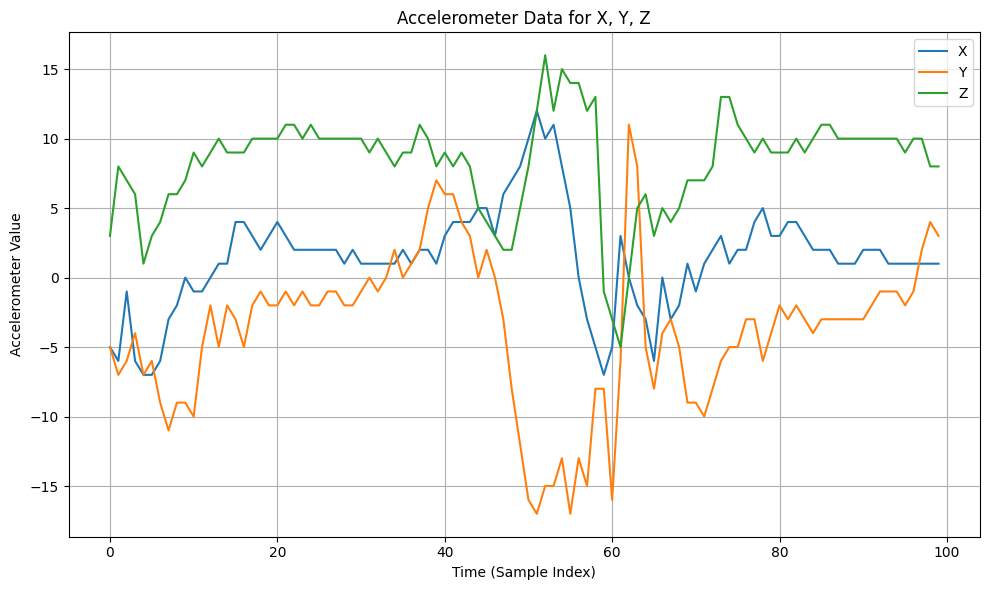

In [2]:
import matplotlib.pyplot as plt

# Data for X, Y, and Z axes
# X = [-3.43, -6.39, -2.8, -4.11, -6.18, -8.01, -10.67, -8.98, -13.07, -15.55, -18.45, -16.76, -10.23, -5.63, 4.38, 10.6, 13.47, 13.49, 10.33, 11.77, 3.33, -7.62, -7.94, -12.58, -29.34, -7.27, -18.98, -14.91, -3.46, -2.12, -2.85, 0.63, 3.89, 5.54, 2.19, 0.27, 1.6, -2.35, -7.74, -5.3, -1.28, -3.81, -4.51, -2.91, -2.99, -2.24, -2.57, -2.33, -2.05, -1.47, -1.29, -0.87, -0.68, 0.08, -0.03, 0.73, 0.87, 1.4, 1.35, 1.37, 1.82, 1.6, 1.56, 2.26, 5.18, 5.38, 0.73, -6.06, -6.42, -3.47, -5.99, -10.18, -12.92, -10.4, -11.45, -13.73, -13.19, -12.29, -9.75, -6.92, -0.41, 5.42, 7.68, 13.68, 16.62, 9.68, 7.85, 10.29, -7.12, -7.69, -11.34, -25.78, -5.63, -12.11, -11.51, -11.49, -7.06, 0.42, 1.67, 4.72]
# Y = [9.48, 4.0, 6.42, 2.5, -0.43, -8.53, -18.37, -15.02, -23.15, -22.74, -20.1, -17.63, -17.9, -7.12, -11.61, -16.53, -19.72, -5.94, 2.38, 11.3, 8.09, 6.04, -7.2, 9.37, -14.66, -14.65, -12.16, -10.27, -10.51, -1.67, -6.49, -13.37, -10.22, -2.85, -7.87, -7.66, -9.49, -8.57, -7.57, -10.76, -13.9, -11.88, -11.67, -11.41, -12.04, -12.08, -10.62, -11.37, -11.24, -11.06, -10.9, -11.41, -10.66, -10.76, -10.85, -11.07, -10.83, -10.7, -10.97, -9.96, -8.01, -6.59, -3.57, -0.58, 9.36, 9.53, 7.94, 11.79, 6.9, 3.49, 1.44, -0.13, -19.56, -18.42, -16.81, -17.89, -14.92, -21.99, -22.08, -15.44, -10.27, -8.73, -11.92, -13.16, -9.08, -2.16, 9.64, 8.92, 8.67, -3.0, 2.43, -31.0, -13.72, -13.24, -14.43, -13.5, -5.1, -10.16, -3.52, -4.6]
# Z = [7.94, 8.15, 0.36, -5.7, -5.13, 5.32, 10.82, 10.45, 11.48, 12.22, 16.05, 14.63, 16.12, 13.4, 11.39, 13.95, 3.31, 0.93, 9.34, 1.41, 2.81, -0.66, -1.57, 5.02, -14.38, -1.72, 7.74, 8.03, 2.49, 3.85, 7.39, 4.19, 5.27, 9.07, 8.51, 7.87, 7.3, 6.4, 9.99, 9.66, 6.06, 6.66, 6.78, 4.37, 3.69, 2.92, 3.89, 2.87, 2.46, 2.08, 2.91, 2.28, 2.09, 2.96, 2.28, 2.67, 2.8, 1.88, 2.49, 2.46, 2.2, 3.37, 4.95, 6.82, 5.39, 5.1, 4.81, 9.22, 4.58, -3.93, -5.41, -1.49, 9.78, 13.53, 14.54, 13.7, 12.05, 13.86, 13.53, 15.69, 17.42, 13.29, 7.55, 1.75, -1.02, 4.36, 4.38, -1.6, 5.66, -0.3, -1.73, -2.4, -5.07, -0.83, 3.57, 9.58, 4.56, 2.03, 6.8, 7.68]

X= [-5, -6, -1, -6, -7, -7, -6, -3, -2, 0, -1, -1, 0, 1, 1, 4, 4, 3, 2, 3, 4, 3, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 3, 4, 4, 4, 5, 5, 3, 6, 7, 8, 10, 12, 10, 11, 8, 5, 0, -3, -5, -7, -5, 3, 0, -2, -3, -6, 0, -3, -2, 1, -1, 1, 2, 3, 1, 2, 2, 4, 5, 3, 3, 4, 4, 3, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1]
Y= [-5, -7, -6, -4, -7, -6, -9, -11, -9, -9, -10, -5, -2, -5, -2, -3, -5, -2, -1, -2, -2, -1, -2, -1, -2, -2, -1, -1, -2, -2, -1, 0, -1, 0, 2, 0, 1, 2, 5, 7, 6, 6, 4, 3, 0, 2, 0, -3, -8, -12, -16, -17, -15, -15, -13, -17, -13, -15, -8, -8, -16, -6, 11, 8, -5, -8, -4, -3, -5, -9, -9, -10, -8, -6, -5, -5, -3, -3, -6, -4, -2, -3, -2, -3, -4, -3, -3, -3, -3, -3, -3, -2, -1, -1, -1, -2, -1, 2, 4, 3]
Z= [3, 8, 7, 6, 1, 3, 4, 6, 6, 7, 9, 8, 9, 10, 9, 9, 9, 10, 10, 10, 10, 11, 11, 10, 11, 10, 10, 10, 10, 10, 10, 9, 10, 9, 8, 9, 9, 11, 10, 8, 9, 8, 9, 8, 5, 4, 3, 2, 2, 5, 8, 12, 16, 12, 15, 14, 14, 12, 13, -1, -3, -5, 0, 5, 6, 3, 5, 4, 5, 7, 7, 7, 8, 13, 13, 11, 10, 9, 10, 9, 9, 9, 10, 9, 10, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 9, 10, 10, 8, 8]
plt.figure(figsize=(10, 6))

plt.plot(X, label="X")
plt.plot(Y, label="Y")
plt.plot(Z, label="Z")

# Adding titles and labels
plt.title("Accelerometer Data for X, Y, Z")
plt.xlabel("Time (Sample Index)")
plt.ylabel("Accelerometer Value")
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()
